# Langkah 1: Pemuatan dan Inspeksi Data

1. Muat Data:

In [2]:
import pandas as pd
import numpy as np

file = "https://raw.githubusercontent.com/Faris0520/filecolab/refs/heads/main/dataset_preprocessing_200rows.csv"
df = pd.read_csv(file)

2. Inspeksi Awal:

In [3]:
df.head()

,CustomerID,Age,Gender,Education,MonthlyIncomeUSD,ProductCategory,LastPurchaseAmountUSD,SignupDate,Active,Notes
0,ID1095,18.0,Other,High School,4987.77,Grocery,527.49,2019-05-04,No,email bounce
1,ID1015,NaN,Female,NaN,15589.38,Books,1545.92,2019-02-09,No,NaN
2,ID1030,25.0,Male,Bachelor,3688.88,Grocery,305.25,2024-03-25,No,NaN
3,ID1158,20.0,Male,Diploma,2189.54,Grocery,253.28,2025-06-25,Yes,NaN
4,ID1128,30.0,Other,NaN,1159.85,Electronics,88.98,2023-04-15,No,email bounce


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             200 non-null    object 
 1   Age                    172 non-null    float64
 2   Gender                 200 non-null    object 
 3   Education              174 non-null    object 
 4   MonthlyIncomeUSD       175 non-null    float64
 5   ProductCategory        200 non-null    object 
 6   LastPurchaseAmountUSD  200 non-null    float64
 7   SignupDate             200 non-null    object 
 8   Active                 200 non-null    object 
 9   Notes                  127 non-null    object 
dtypes: float64(3), object(7)
memory usage: 15.8+ KB


3. Ringkasan Statistik

In [10]:
df.describe()

,Age,MonthlyIncomeUSD,LastPurchaseAmountUSD
count,172.000000,175.000000,200.00000
mean,29.220930,4408.440057,413.85155
std,7.116246,8077.635957,764.47574
min,18.000000,410.220000,0.00000
25%,24.000000,2180.330000,192.62500
50%,29.000000,3461.810000,337.84000
75%,34.000000,4820.630000,484.27500
max,49.000000,105920.640000,10588.41000


# Langkah 2: Penanganan Missing Values (Nilai Hilang)

1. Mengidentifikasi persentase missing value

In [6]:
print("Jumlah Missing Value per Kolom:")
print(df.isnull().sum())

Jumlah Missing Value per Kolom:
CustomerID                0
Age                      28
Gender                    0
Education                26
MonthlyIncomeUSD         25
ProductCategory           0
LastPurchaseAmountUSD     0
SignupDate                0
Active                    0
Notes                    73
dtype: int64


2. Tentukan Strategi untuk menangani missing value

In [11]:
df_filled = df.copy()

# Kategorikal
for col in df_filled.select_dtypes(include='object').columns:
  df_filled[col] = df_filled[col].fillna(df_filled[col].mode()[0])

# Numerikal
for col in df_filled.select_dtypes(include=[np.number]).columns:
  df_filled[col] = df_filled[col].fillna(df_filled[col].median())

In [12]:
print("\nJumlah Missing Value per kolom (setelah isi mean):")
print(df_filled.isnull().sum())


Jumlah Missing Value per kolom (setelah isi mean):
CustomerID               0
Age                      0
Gender                   0
Education                0
MonthlyIncomeUSD         0
ProductCategory          0
LastPurchaseAmountUSD    0
SignupDate               0
Active                   0
Notes                    0
dtype: int64


# Langkah 3: Penanganan Outlier (Pencilan)

1. Identifikasi keberadaan outlier

<Axes: xlabel='LastPurchaseAmountUSD'>

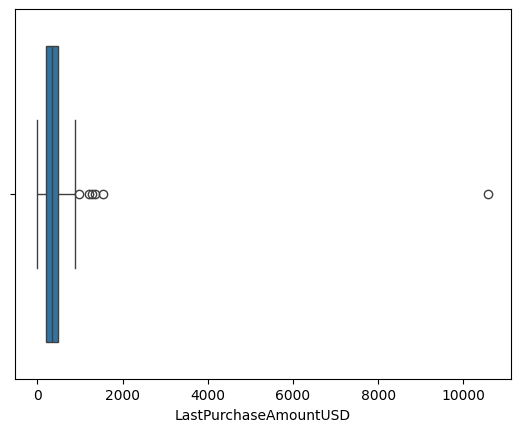

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x = df["LastPurchaseAmountUSD"])

<Axes: xlabel='MonthlyIncomeUSD'>

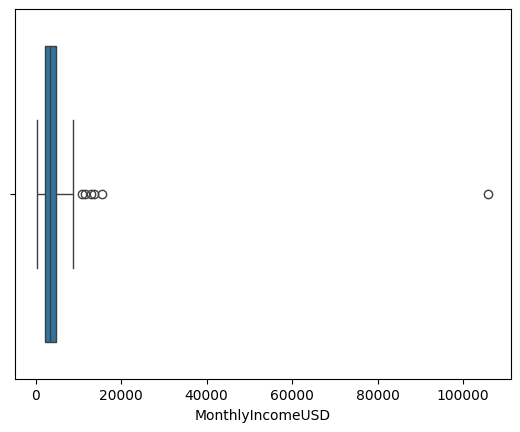

In [15]:
sns.boxplot(x = df["MonthlyIncomeUSD"])

<Axes: xlabel='Age'>

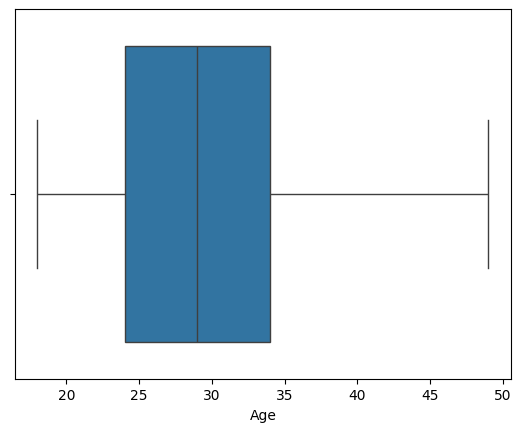

In [16]:
sns.boxplot(x = df["Age"])

2. Mengidentifikasi dan Menangani outlier

In [32]:
kolom_numerik = ["LastPurchaseAmountUSD", "MonthlyIncomeUSD"]
for col in kolom_numerik:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Hapus baris yang masih ada missing value
df_clean = df.dropna()

# Deteksi Outlier dengan metode IQR + tampilkan bound
for col in kolom_numerik:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\nAnalisis kolom: {col}")
    print(f"Q1 (25%)       : {Q1}")
    print(f"Q3 (75%)       : {Q3}")
    print(f"IQR            : {IQR}")
    print(f"Lower Bound    : {lower_bound}")
    print(f"Upper Bound    : {upper_bound}")

    # Data yang termasuk outlier
    outlier_rows = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    print("\nOutlier ditemukan:")
    if outlier_rows.empty:
        print("Tidak ada outlier pada kolom ini.")
    else:
        print(outlier_rows[["CustomerID", "Gender", col]])


Analisis kolom: LastPurchaseAmountUSD
Q1 (25%)       : 232.98250000000002
Q3 (75%)       : 543.87
IQR            : 310.8875
Lower Bound    : -233.34874999999994
Upper Bound    : 1010.20125

Outlier ditemukan:
   CustomerID  Gender  LastPurchaseAmountUSD
23     ID1093  Female                1277.94
31     ID1018  Female                1201.31
74     ID1118    Male                1344.91

Analisis kolom: MonthlyIncomeUSD
Q1 (25%)       : 2607.5550000000003
Q3 (75%)       : 5467.755
IQR            : 2860.2
Lower Bound    : -1682.744999999999
Upper Bound    : 9758.055

Outlier ditemukan:
    CustomerID  Gender  MonthlyIncomeUSD
23      ID1093  Female          12838.12
31      ID1018  Female          11544.44
74      ID1118    Male          13624.11
101     ID1032  Female          10831.20


# Langkah 4: Encoding Data Kategorikal

1. Mengidentifikasi semua kolom yang memiliki tipe data objek

In [34]:
df_objek = df.select_dtypes(include=["object", "category", "string"]).columns.tolist()
df_objek

['CustomerID',
 'Gender',
 'Education',
 'ProductCategory',
 'SignupDate',
 'Active',
 'Notes']

2. Terapkan Encoding:
Untuk variabel ordinal (memiliki urutan, misal: 'Pendidikan'), gunakan Label Encoding.

In [43]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_clean.copy()

label_encoder = LabelEncoder()
df_encoded['Education_Encoded'] = label_encoder.fit_transform(df_encoded['Education'])

kolom_untuk_onehot = ["Gender", "ProductCategory", "Active"]
df_encoded = pd.get_dummies(df_encoded, columns=kolom_untuk_onehot, drop_first=True)

df_encoded['SignupDate'] = pd.to_datetime(df_encoded['SignupDate'])

df_encoded = df_encoded.drop('Education', axis=1)

print("\nDataFrame setelah Encoding dan konversi SignupDate:")
display(df_encoded.head())


DataFrame setelah Encoding dan konversi SignupDate:


,CustomerID,Age,MonthlyIncomeUSD,LastPurchaseAmountUSD,SignupDate,Notes,Education_Encoded,Gender_Male,Gender_Other,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Grocery,ProductCategory_Home,Active_Yes
0,ID1095,18.0,4987.77,527.49,2019-05-04,email bounce,2,False,True,False,False,True,False,False
5,ID1115,32.0,2641.86,366.34,2023-11-23,no issues,2,False,True,False,False,True,False,False
7,ID1170,22.0,8121.34,797.75,2023-12-05,frequent buyer,1,False,False,False,False,True,False,False
11,ID1182,21.0,2663.50,239.47,2023-02-01,email bounce,3,True,False,False,False,False,True,False
13,ID1078,30.0,6898.59,568.16,2021-06-14,no issues,1,False,False,True,False,False,False,False


# Langkah 5: Penskalaan Data Numerik

In [40]:
kolom_numerik = df_encoded.select_dtypes(include=[np.number]).columns.tolist()

print("Kolom numerik yang akan diskalakan:")
print(kolom_numerik)

Kolom numerik yang akan diskalakan:
['Age', 'MonthlyIncomeUSD', 'LastPurchaseAmountUSD', 'Education_Encoded']


In [42]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Terapkan penskalaan pada kolom numerik
df_scaled = df_encoded.copy()
df_scaled[kolom_numerik] = scaler.fit_transform(df_scaled[kolom_numerik])

print("\nDataFrame setelah Penskalaan Min-Max:")
display(df_scaled.head())


DataFrame setelah Penskalaan Min-Max:


,CustomerID,Age,MonthlyIncomeUSD,LastPurchaseAmountUSD,SignupDate,Notes,Education_Encoded,Gender_Male,Gender_Other,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Grocery,ProductCategory_Home,Active_Yes
0,ID1095,0.000000,0.317154,0.392212,2019-05-04,email bounce,0.50,False,True,False,False,True,False,False
5,ID1115,0.482759,0.131670,0.272390,2023-11-23,no issues,0.50,False,True,False,False,True,False,False
7,ID1170,0.137931,0.564914,0.593162,2023-12-05,frequent buyer,0.25,False,False,False,False,True,False,False
11,ID1182,0.103448,0.133381,0.178057,2023-02-01,email bounce,0.75,True,False,False,False,False,True,False
13,ID1078,0.413793,0.468236,0.422452,2021-06-14,no issues,0.25,False,False,True,False,False,False,False


In [44]:
df_scaled.to_csv('clean_data.csv', index=False)
print("DataFrame berhasil disimpan di clean_data.csv")

DataFrame berhasil disimpan di clean_data.csv
